In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/')
print(sys.executable)

import json
from visualization.visualize import plotErrorToAdaptIterations, plotErrorToAdaptAndOptimizerIterations, plotErrorToCumulativeShots

/home/azhar04/anaconda3/envs/qiskit-1-2/bin/python


In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt

def plotErrorToAdaptIterations(data):
    plt.rcParams['figure.dpi'] = 300
    exact_energy = data['fci_energy']

    energies_statevector = []
    energies_uniform = []
    energies_vmsa = []
    energies_vpsr = []

    std_uniform = []
    std_vmsa = []
    std_vpsr = []

    for i in range(len(data['data_list'])):
        energies_statevector.append(data['data_list'][i]['energies_statevector'][-1])
        energies_uniform.append(data['data_list'][i]['energies_uniform'][-1])
        energies_vmsa.append(data['data_list'][i]['energies_vmsa'][-1])
        energies_vpsr.append(data['data_list'][i]['energies_vpsr'][-1])
        
        std_uniform.append(data['data_list'][i]['std_uniform'][-1])
        std_vmsa.append(data['data_list'][i]['std_vmsa'][-1])
        std_vpsr.append(data['data_list'][i]['std_vpsr'][-1])


    error_statevector = np.abs(np.array(energies_statevector) - exact_energy)
    error_uniform = np.abs(np.array(energies_uniform) - exact_energy)
    error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)
    error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)

    x = range(len(error_statevector))

    plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594 mHa)')

    plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')
    plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
    plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
    plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

    plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
    plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
    plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

    # plt.yscale('symlog', linthresh=1e-1)
    # plt.yscale('log')
    # plt.ylim(0.1,1)
    plt.ylabel("Energy Error (Ha)")
    plt.xlabel("ADAPT-VQE Iterations")
    plt.xticks([0,1,2])
    plt.legend()


def plotErrorToAdaptAndOptimizerIterations(data):
    plt.rcParams['figure.dpi'] = 300
    exact_energy = data['fci_energy']

    energies_statevector = np.array([])
    energies_uniform = np.array([])
    energies_vmsa = np.array([])
    energies_vpsr = np.array([])

    std_uniform = np.array([])
    std_vmsa = np.array([])
    std_vpsr = np.array([])

    for i in range(len(data['data_list'])):
        energies_statevector = np.append(energies_statevector, np.array(data['data_list'][i]['energies_statevector']))
        energies_uniform = np.append(energies_uniform, np.array(data['data_list'][i]['energies_uniform']))
        energies_vmsa = np.append(energies_vmsa, np.array(data['data_list'][i]['energies_vmsa']))
        energies_vpsr = np.append(energies_vpsr, np.array(data['data_list'][i]['energies_vpsr']))
        std_uniform = np.append(std_uniform, np.array(data['data_list'][i]['std_uniform']))
        std_vmsa = np.append(std_vmsa, np.array(data['data_list'][i]['std_vmsa']))
        std_vpsr = np.append(std_vpsr, np.array(data['data_list'][i]['std_vpsr']))


    error_statevector = np.abs(np.array(energies_statevector) - exact_energy)
    error_uniform = np.abs(np.array(energies_uniform) - exact_energy)
    error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)
    error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)


    # # Removing indices 
    # indices_to_remove = [1,2,3,4,5,6,7,8,9]

    # # Apply np.delete to remove indices 2 and 3 from all relevant arrays
    # energies_statevector = np.delete(energies_statevector, indices_to_remove)
    # energies_uniform = np.delete(energies_uniform, indices_to_remove)
    # energies_vmsa = np.delete(energies_vmsa, indices_to_remove)
    # energies_vpsr = np.delete(energies_vpsr, indices_to_remove)

    # error_statevector = np.delete(error_statevector, indices_to_remove)
    # error_uniform = np.delete(error_uniform, indices_to_remove)
    # error_vmsa = np.delete(error_vmsa, indices_to_remove)
    # error_vpsr = np.delete(error_vpsr, indices_to_remove)

    # std_uniform = np.delete(std_uniform, indices_to_remove)
    # std_vmsa = np.delete(std_vmsa, indices_to_remove)
    # std_vpsr = np.delete(std_vpsr, indices_to_remove)


    plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594 mHa)')

    x = range(len(error_statevector))
    plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')

    plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
    plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
    plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

    plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
    plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
    plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

    # plt.yscale('symlog', linthresh=1e2)
    plt.yscale('log')
    # plt.xscale('log')
    # plt.ylim(-10,1000)
    plt.ylabel("Energy Error (Ha)")
    plt.xlabel("ADAPT-VQE and Optimizer Iterations")
    # plt.xticks([0,1,2,3,4])
    plt.legend()


def plotErrorToCumulativeShots(data):
    plt.rcParams['figure.dpi'] = 300
    exact_energy = data['fci_energy']

    from itertools import accumulate

    shots_uniform = []
    shots_vmsa = []
    shots_vpsr = []

    shots_uniform = [ [ np.sum(sublist) for sublist in data['data_list'][i]['shots_uniform'] ] for i in range(len(data['data_list'])) ]
    shots_vmsa = [ [ np.sum(sublist) for sublist in data['data_list'][i]['shots_vmsa'] ] for i in range(len(data['data_list'])) ]
    shots_vpsr = [ [ np.sum(sublist) for sublist in data['data_list'][i]['shots_vpsr'] ] for i in range(len(data['data_list'])) ]

    cumulative_shots_uniform = [list(accumulate(sublist)) for sublist in shots_uniform]
    cumulative_shots_vmsa = [list(accumulate(sublist)) for sublist in shots_vmsa]
    cumulative_shots_vpsr = [list(accumulate(sublist)) for sublist in shots_vpsr]

    shots_uniform_list = np.array([])
    shots_vmsa_list = np.array([])
    shots_vpsr_list = np.array([])

    energies_statevector = np.array([])
    energies_uniform = np.array([])
    energies_vmsa = np.array([])
    energies_vpsr = np.array([])

    std_uniform = np.array([])
    std_vmsa = np.array([])
    std_vpsr = np.array([])

    for i in range(len(data['data_list'])):
        energies_statevector = np.append(energies_statevector, np.array(data['data_list'][i]['energies_statevector'][-1]))
        energies_uniform = np.append(energies_uniform, np.array(data['data_list'][i]['energies_uniform'][-1]))
        energies_vmsa = np.append(energies_vmsa, np.array(data['data_list'][i]['energies_vmsa'][-1]))
        energies_vpsr = np.append(energies_vpsr, np.array(data['data_list'][i]['energies_vpsr'][-1]))
        
        std_uniform = np.append(std_uniform, np.array(data['data_list'][i]['std_uniform'][-1]))
        std_vmsa = np.append(std_vmsa, np.array(data['data_list'][i]['std_vmsa'][-1]))
        std_vpsr = np.append(std_vpsr, np.array(data['data_list'][i]['std_vpsr'][-1]))
        
        shots_uniform_list = np.append(shots_uniform_list, cumulative_shots_uniform[i][-1])
        shots_vmsa_list = np.append(shots_vmsa_list, cumulative_shots_vmsa[i][-1])
        shots_vpsr_list = np.append(shots_vpsr_list, cumulative_shots_vpsr[i][-1])

    print(shots_uniform_list)

    error_statevector = np.abs(np.array(energies_statevector) - exact_energy)
    error_uniform = np.abs(np.array(energies_uniform) - exact_energy)
    error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)
    error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)

    plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594mHa)')

    plt.plot(shots_uniform_list, error_uniform, label='ADAPT-VQE Uniform', linestyle='--', marker='o', markersize=4)
    plt.plot(shots_vmsa_list, error_vmsa, label='ADAPT-VQE VMSA', linestyle='--', marker='^', markersize=4)
    plt.plot(shots_vpsr_list, error_vpsr, label='ADAPT-VQE VPSR', linestyle='--', marker='s', markersize=4)

    plt.fill_between(shots_uniform_list, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
    plt.fill_between(shots_vmsa_list, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
    plt.fill_between(shots_vpsr_list, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')


    # plt.yscale('symlog', linthresh=1e0)
    # plt.yscale('log')

    plt.xscale('log')
    # plt.ylim(0.001,0.1)

    plt.ylabel("Energy Error (Ha)")
    plt.xlabel("Cumulative Shots")
    # plt.xticks([0,1,2,3,4])
    plt.legend()

In [3]:
filename = '../data/data_LiH_N=10240_k=100_Nexp=100_T=010225_113627.json'

with open(filename, 'r') as json_file:
    data_LiH = json.load(json_file)

# data_LiH


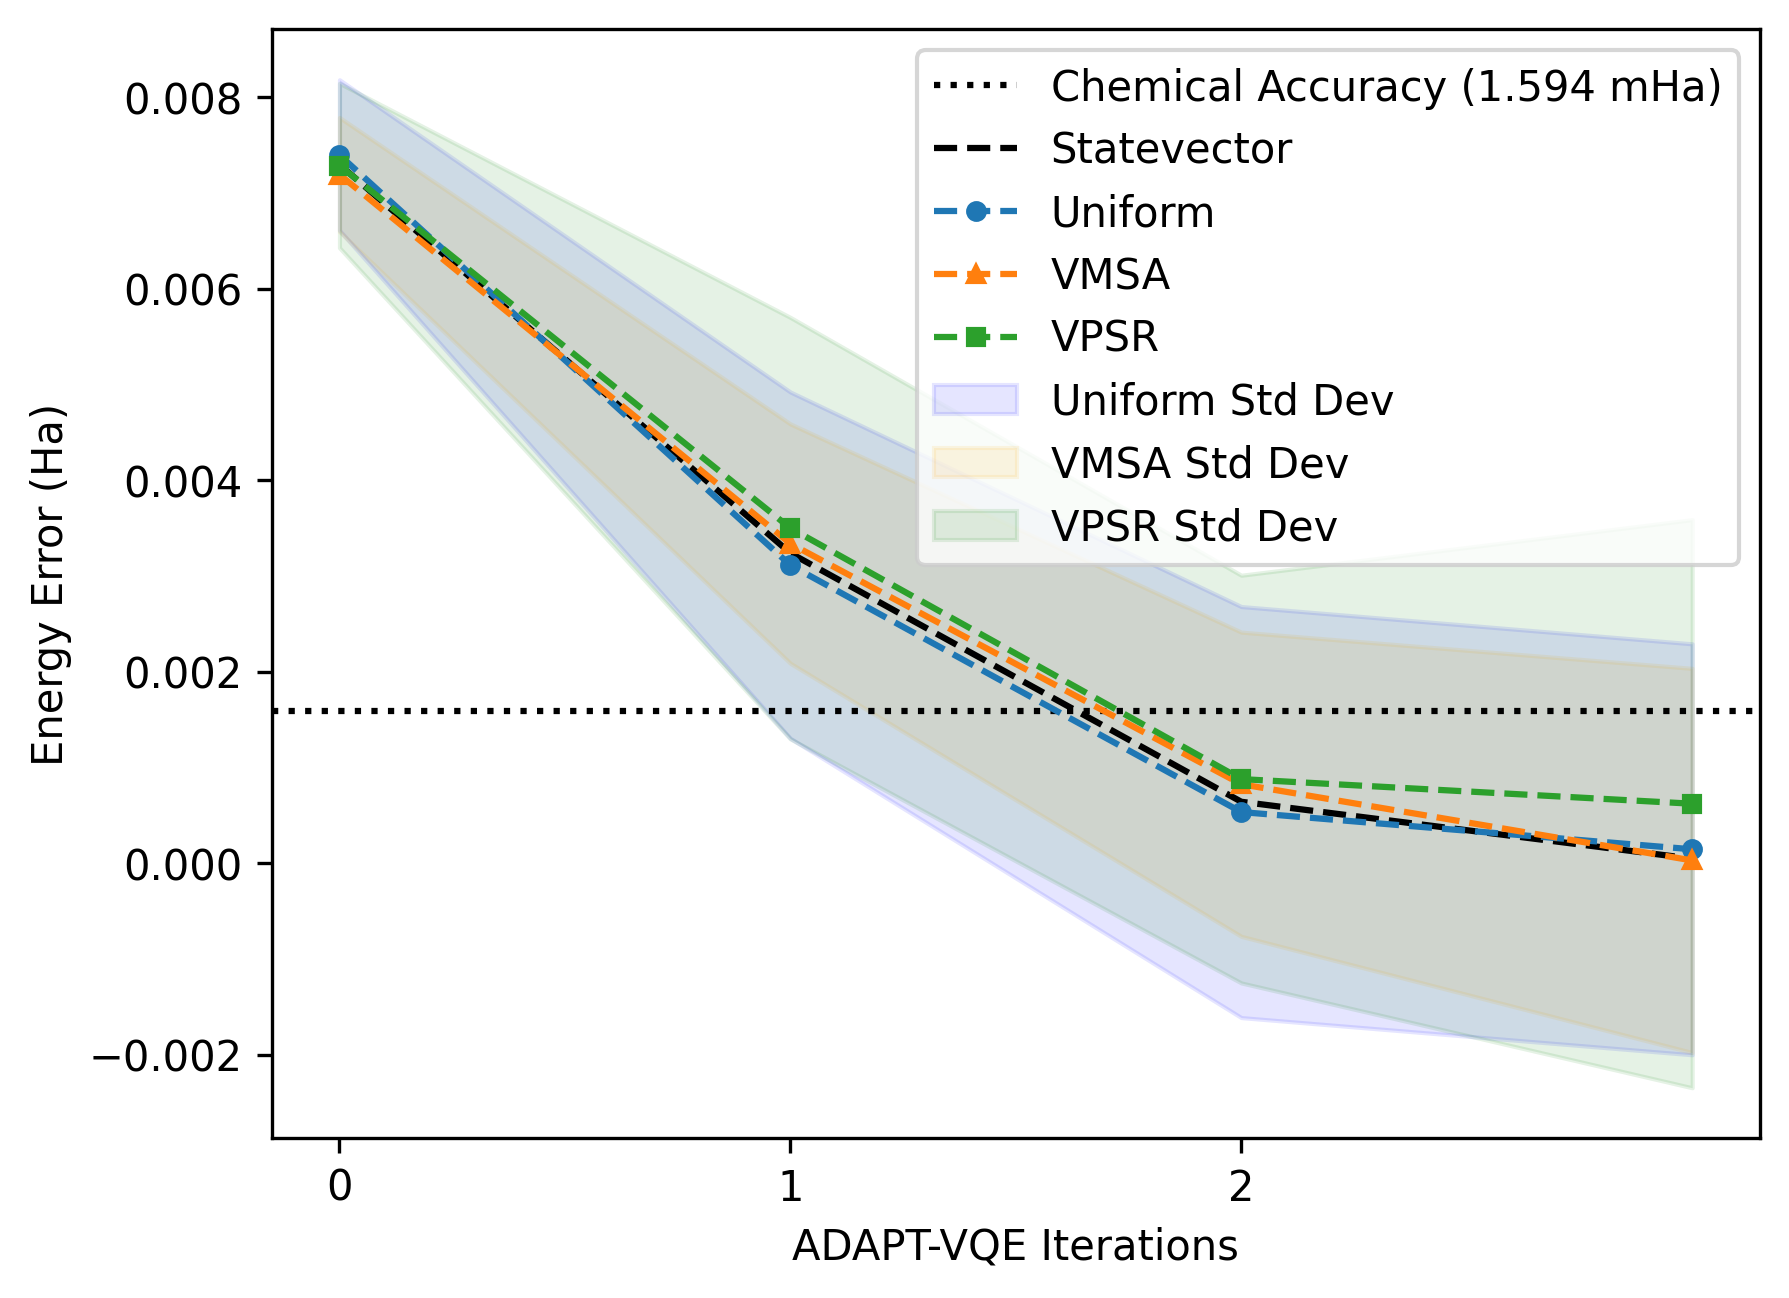

In [4]:
plotErrorToAdaptIterations(data_LiH)

[ 10240. 102400. 184320. 286720.]


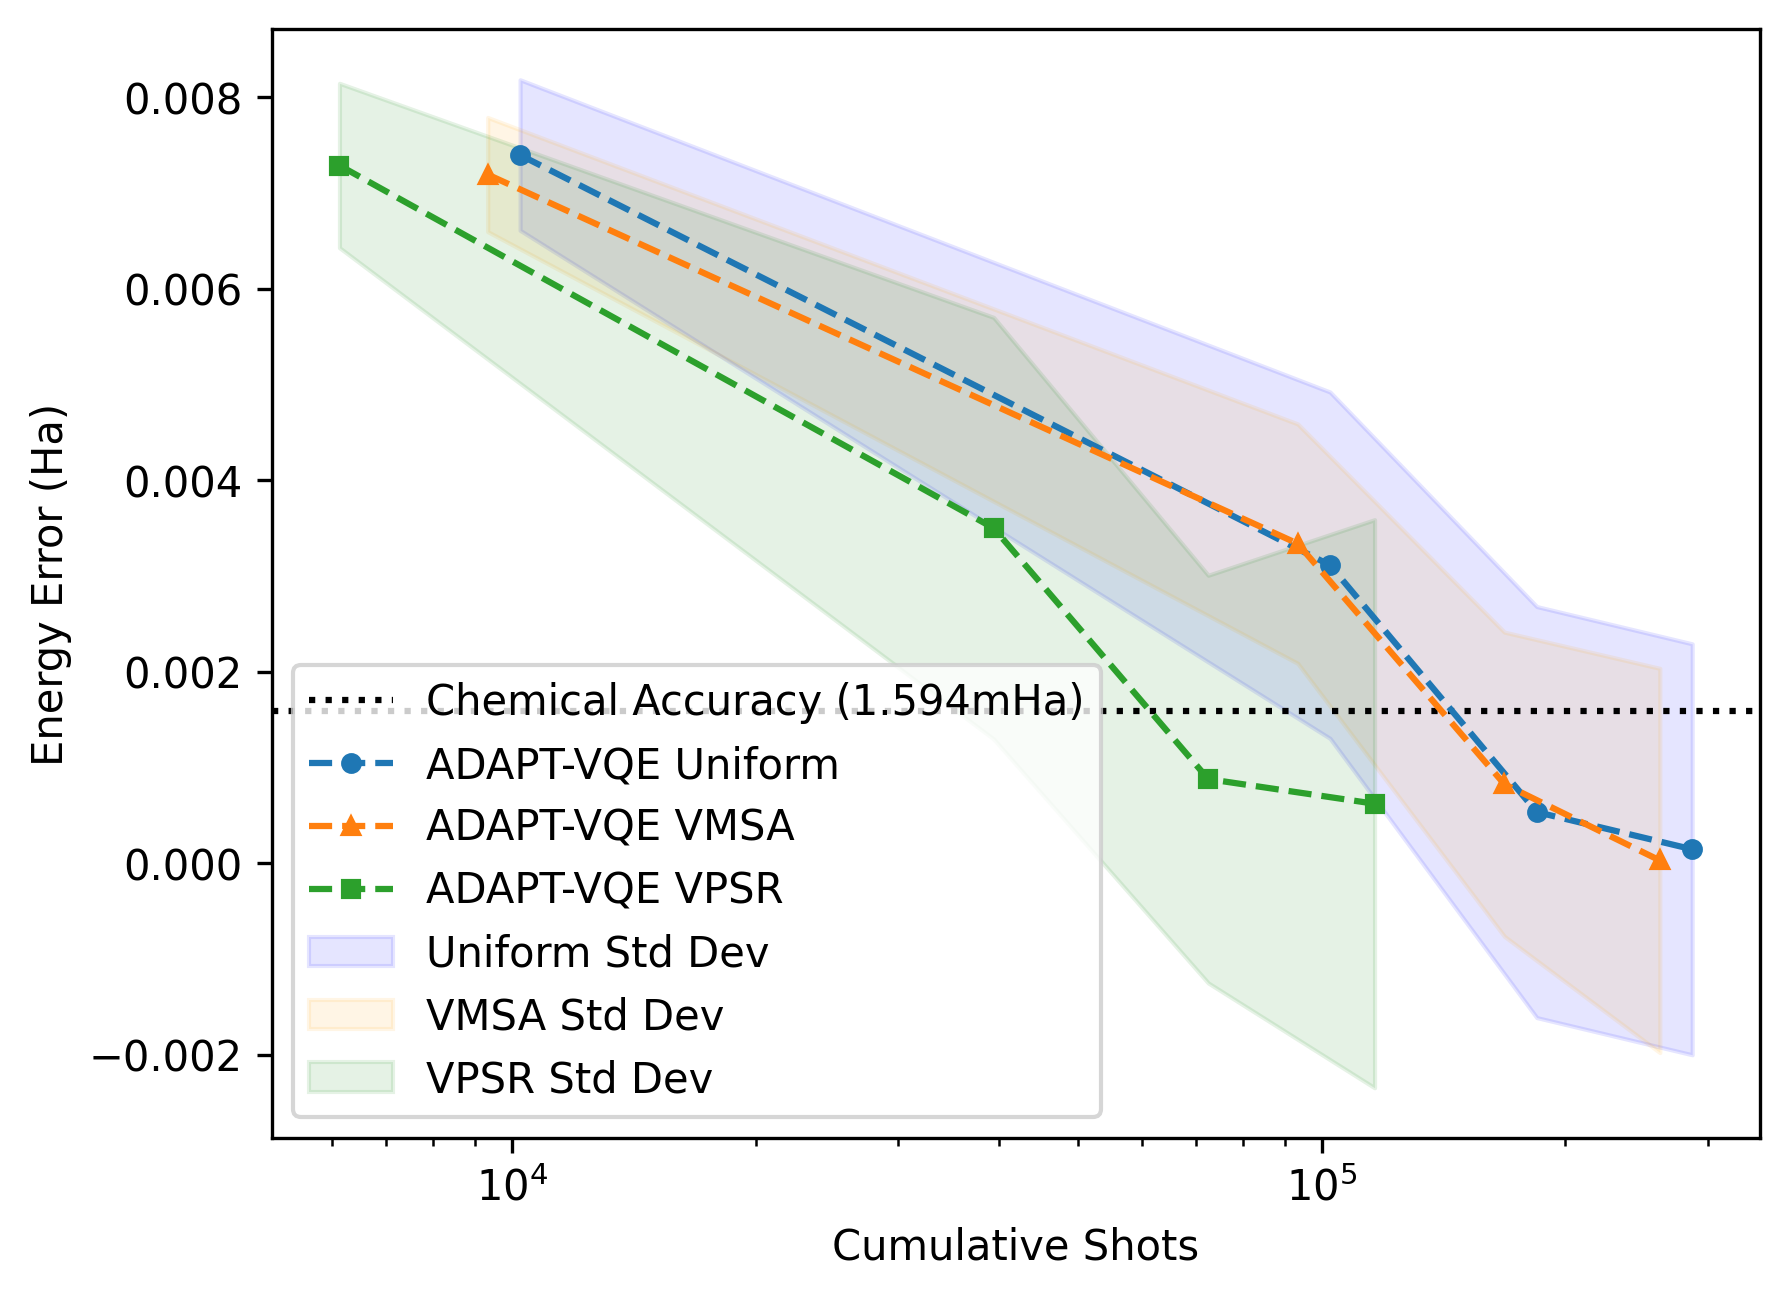

In [5]:
plotErrorToCumulativeShots(data_LiH)

In [86]:
filename = '../data/data_LiH_N=10240_k=100_Nexp=100_T=010225_105755_2.json'

with open(filename, 'r') as json_file:
    data_LiH = json.load(json_file)

# data_LiH


In [87]:
len(data_LiH['data_list'])

3

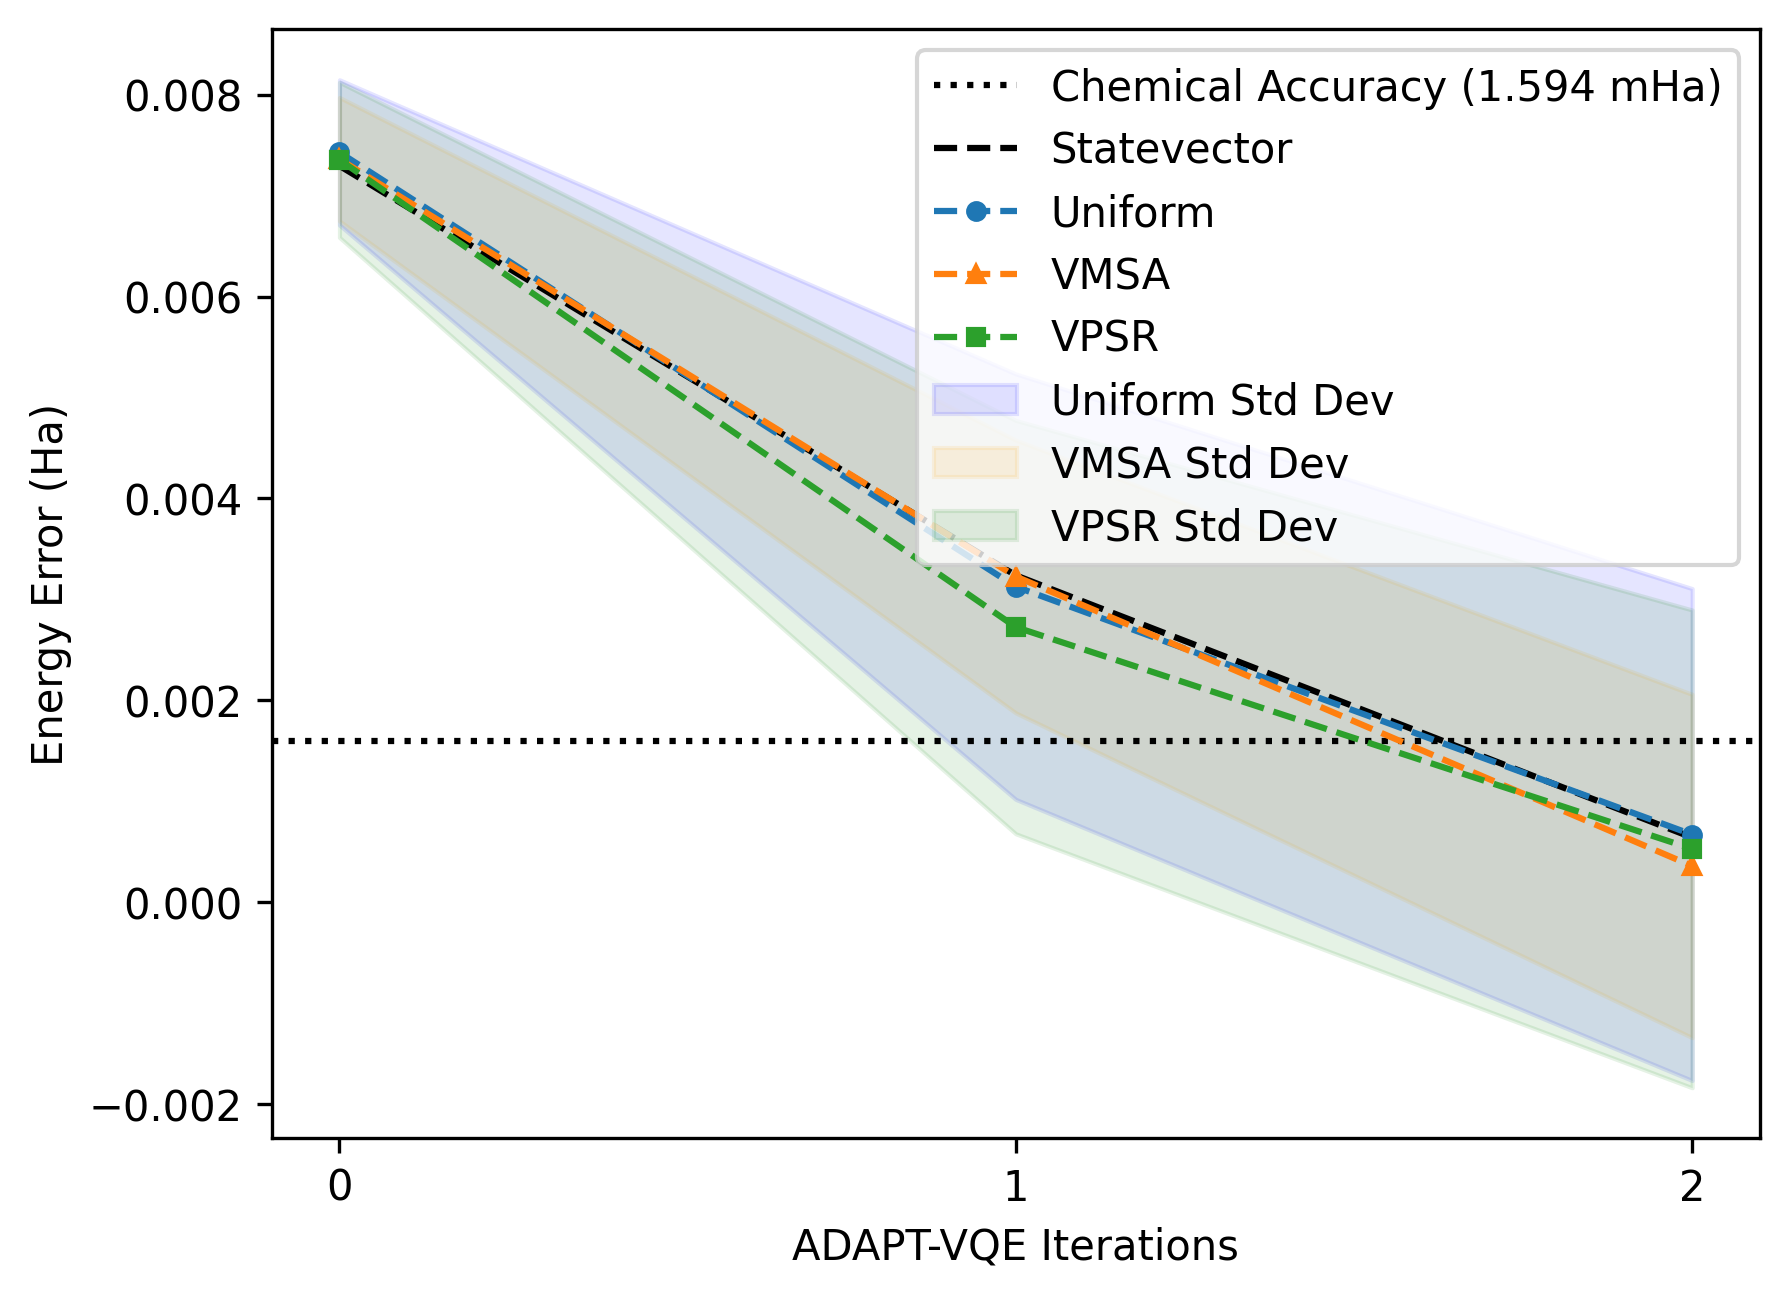

In [93]:
plotErrorToAdaptIterations(data_LiH)
plt.savefig('LiH_1_Iter.pdf', format='pdf',  bbox_inches='tight')

[ 10240. 102400. 184320.]


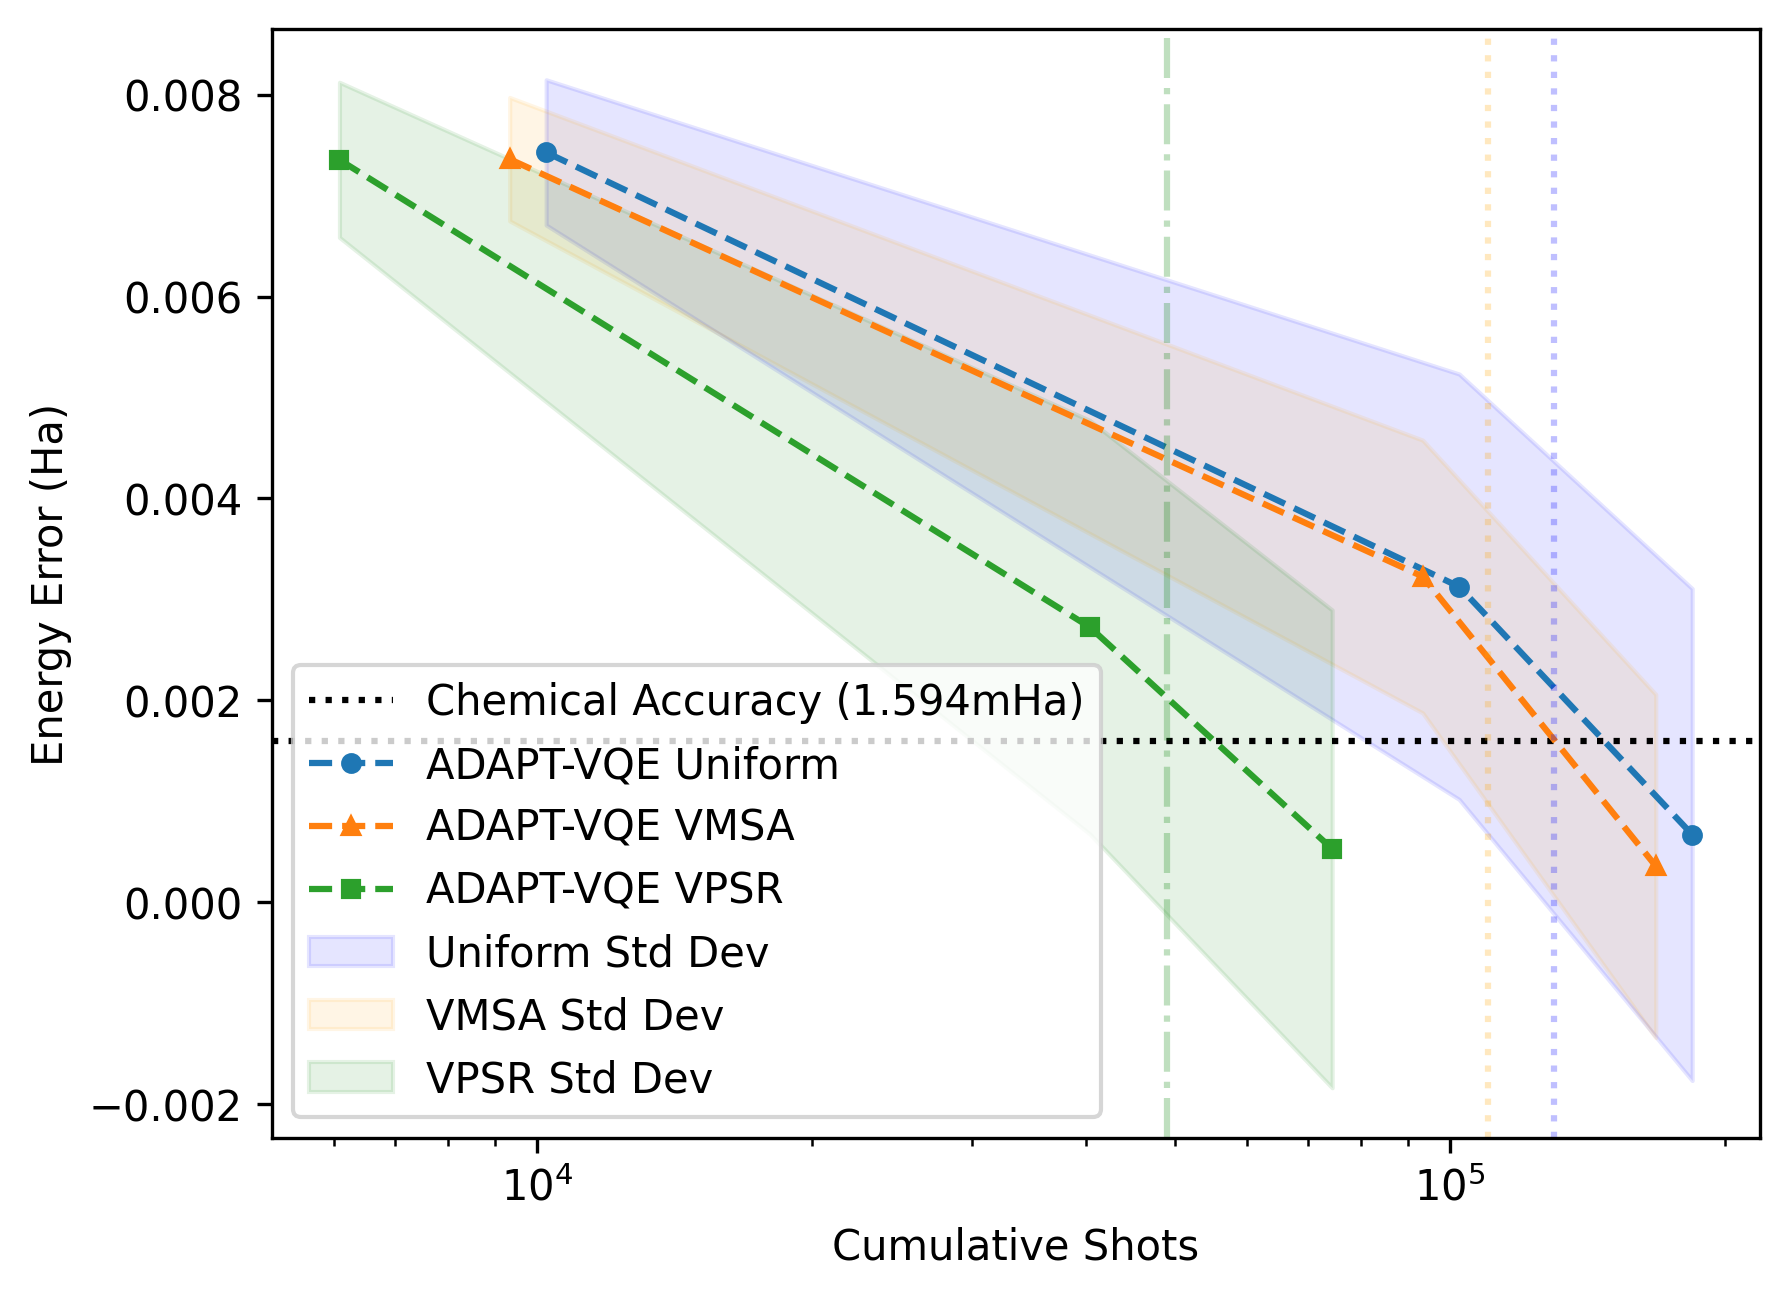

In [111]:
plotErrorToCumulativeShots(data_LiH)

plt.axvline(49000, color='green', linestyle='dashdot', alpha=0.25)
plt.axvline(110000, color='orange', linestyle='dotted', alpha=0.25)
plt.axvline(130000, color='blue', linestyle='dotted', alpha=0.25)

plt.savefig('LiH_2_Iter_Shots.pdf', format='pdf',  bbox_inches='tight')

/tmp/ipykernel_580231/929864827.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


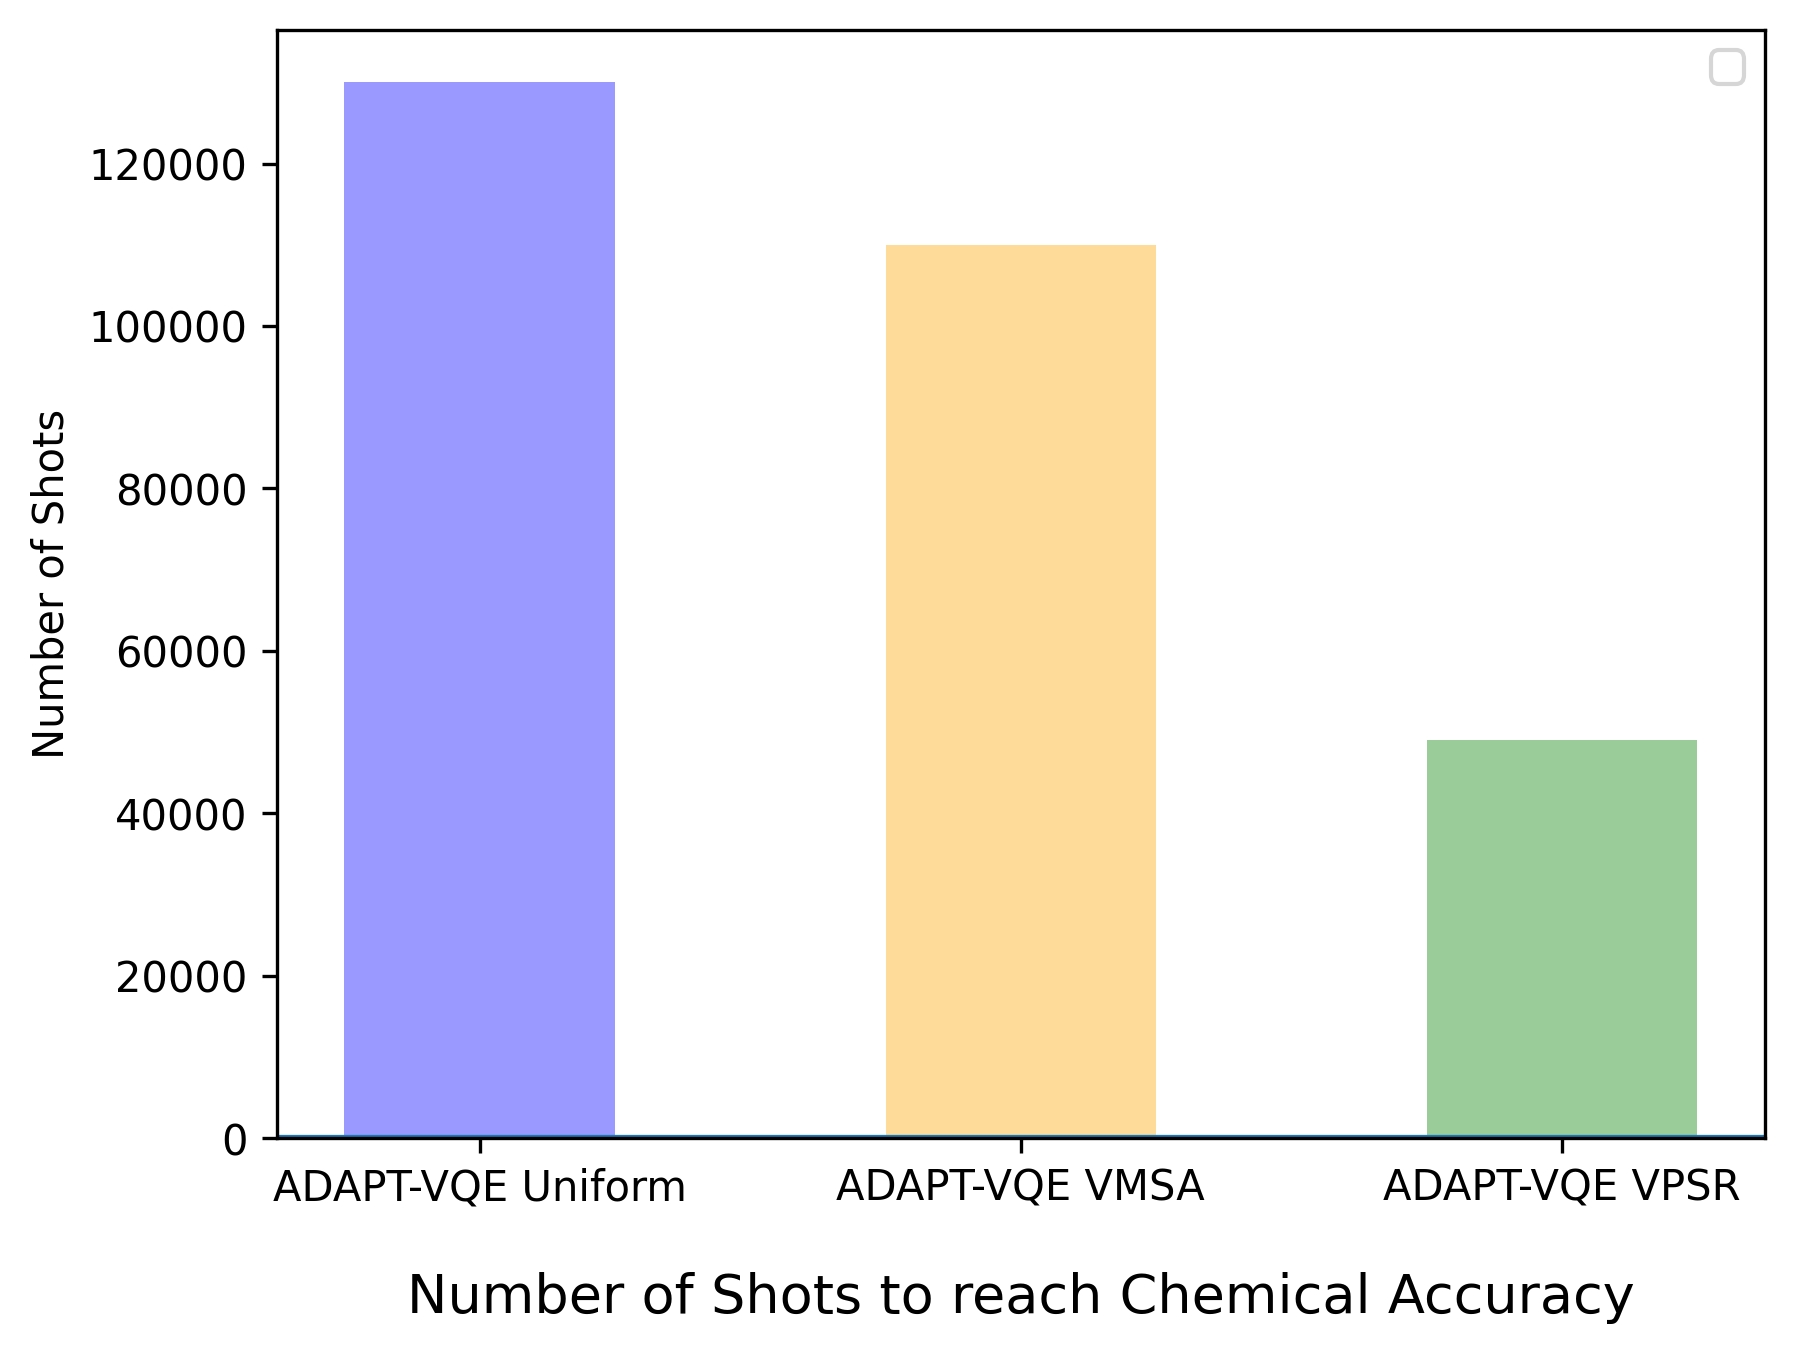

In [95]:
w = 0.5
alp = 0.4

plt.bar('ADAPT-VQE Uniform', 130000, width=w, alpha=alp, color='blue')
plt.bar('ADAPT-VQE VMSA', 110000, width=w, alpha=alp, color='orange')
plt.bar('ADAPT-VQE VPSR', 49000, width=w, alpha=alp, color='green')
plt.legend()
plt.axhline()
plt.ylabel("Number of Shots")
plt.xlabel("Number of Shots to reach Chemical Accuracy", fontsize=13, labelpad=15)

plt.savefig('LiH_3_Shots.pdf', format='pdf',  bbox_inches='tight')

In [79]:
filename = '../data/data_LiH_N=10240_k=100_Nexp=100_T=010225_113627.json'

with open(filename, 'r') as json_file:
    data_LiH = json.load(json_file)

# data_LiH


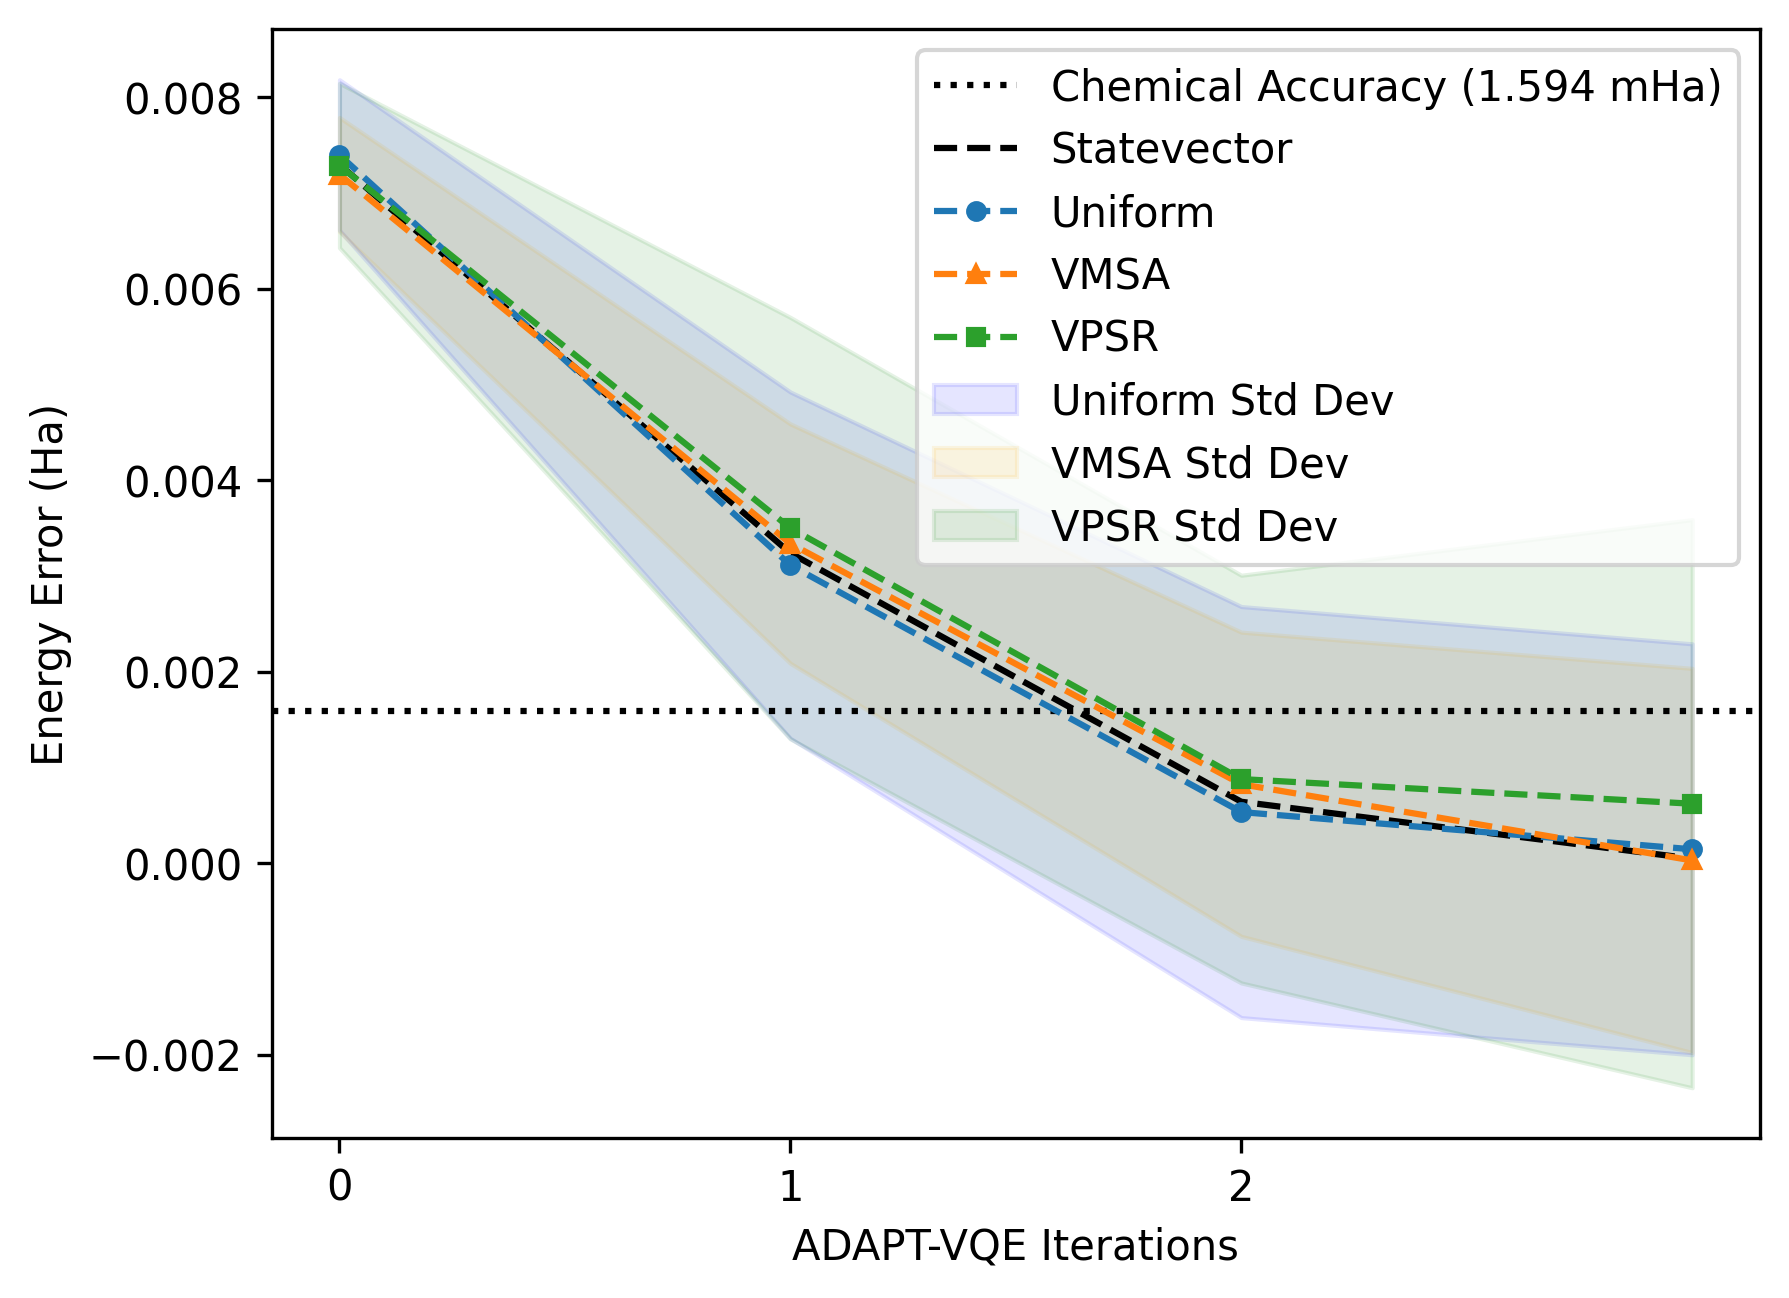

In [80]:
plotErrorToAdaptIterations(data_LiH)

[ 10240. 102400. 184320. 286720.]


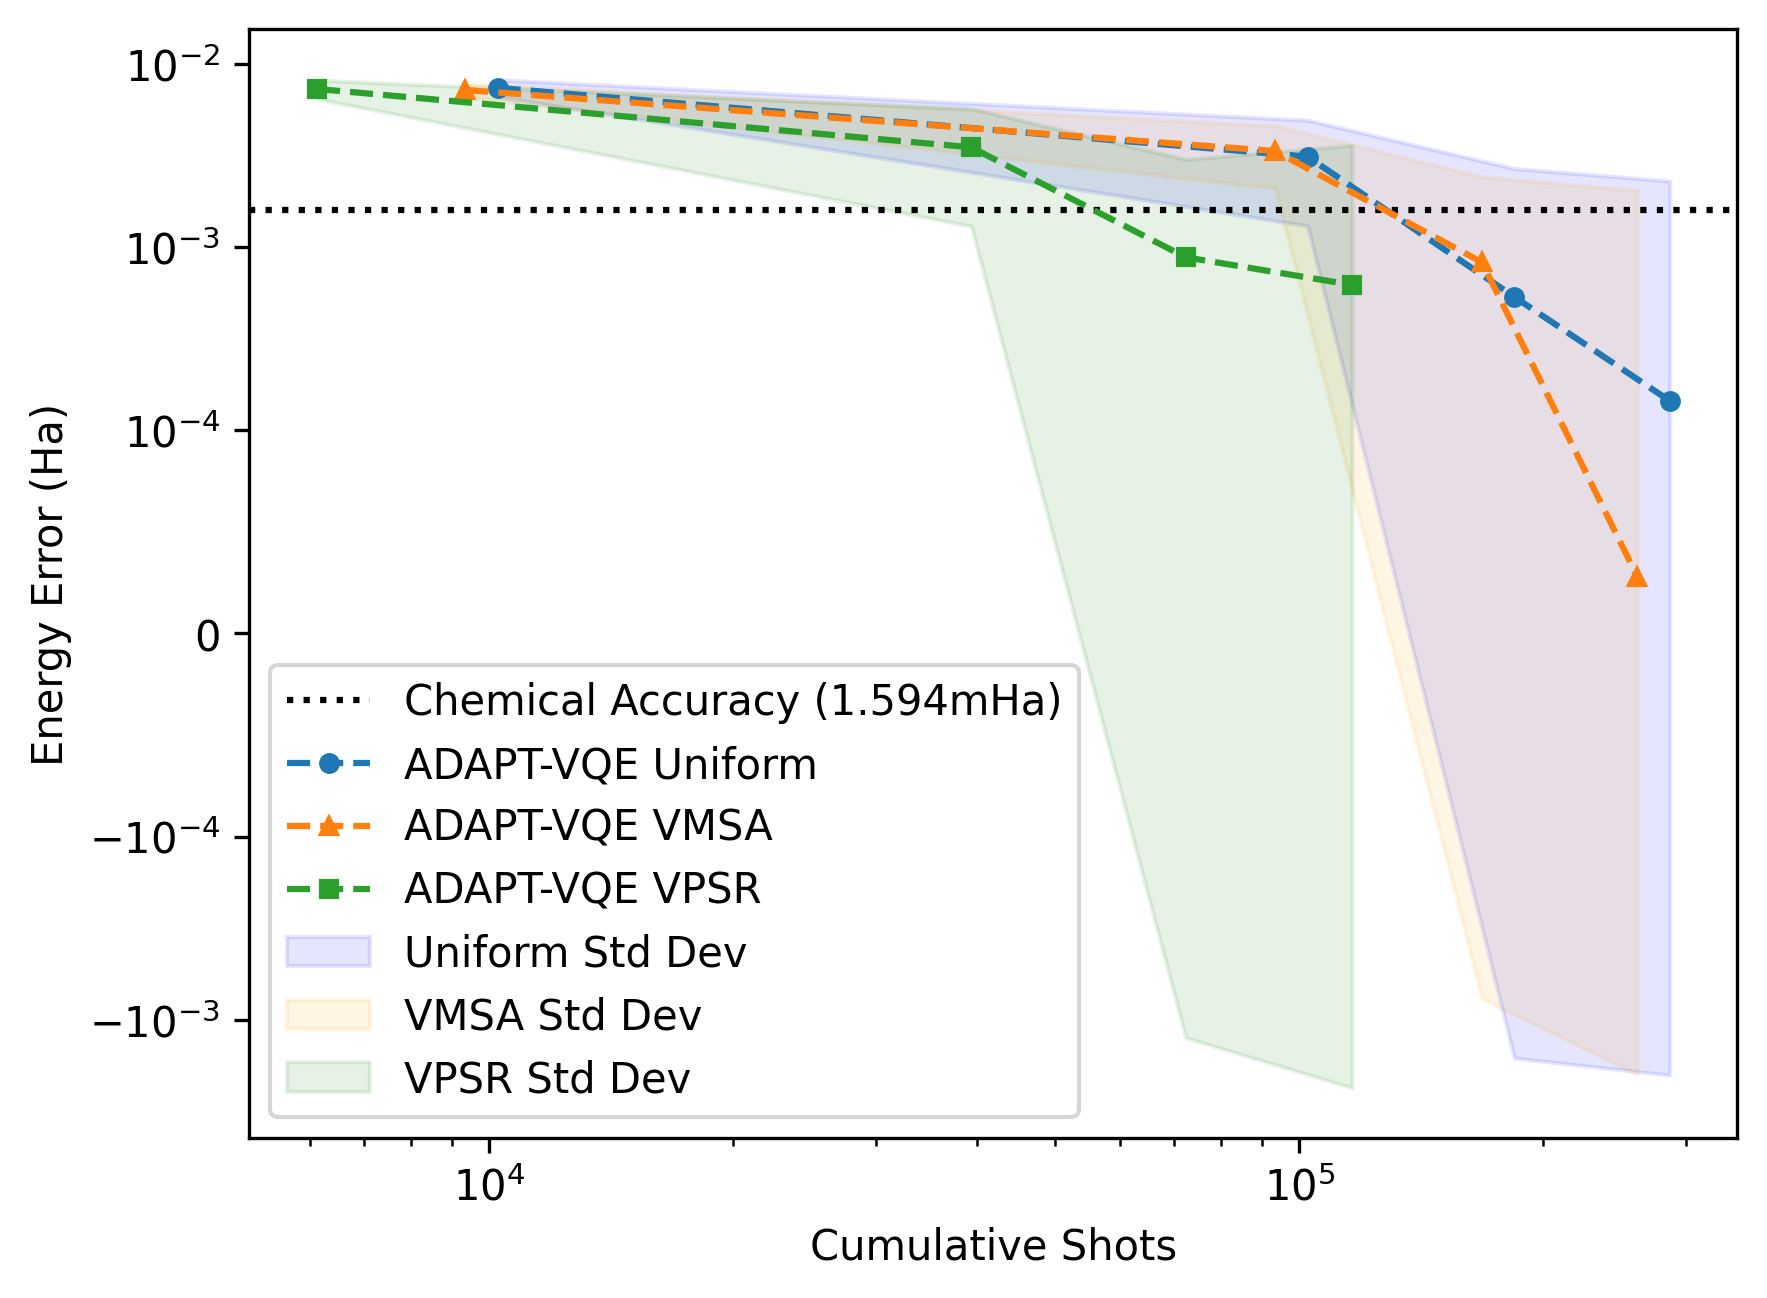

In [84]:
plotErrorToCumulativeShots(data_LiH)